# Credit Risk Evaluator

In [1]:
# Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
df = pd.read_csv("Resources/lending_data.csv")
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df.num_of_accounts.value_counts()

4     24669
3     24339
5     10973
2     10394
6      2046
1      1908
12      817
11      684
13      559
10      398
14      222
7       169
9       137
0       130
8        43
15       41
16        7
Name: num_of_accounts, dtype: int64

In [5]:
df.derogatory_marks.value_counts()

0    50497
1    24174
2     2351
3      514
Name: derogatory_marks, dtype: int64

In [6]:
df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

I believe that the Logistic Regression model will perform better than the Random Forests Classifier model. I believe this because Logistic Regression models are usually better for numerical data while Random Forests are usually better for categorical data.

## Split the Data into Training and Testing Sets

In [11]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop("loan_status", axis=1).values
y = df.loc[:, ["loan_status"]].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

0.7 : 0.3


## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [12]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[52247   278]
 [  184  1566]]

                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     52525
           1       0.85      0.89      0.87      1750

    accuracy                           0.99     54275
   macro avg       0.92      0.94      0.93     54275
weighted avg       0.99      0.99      0.99     54275

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[22411   100]
 [   58   692]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.92      0.90       750

    accuracy                           0.99     23261
   macro avg       0.94      0.96      0.95     23261
weighted avg       0.99      0.99      0.99     23261

    

AUC for the Model Test Set: 0.9968795107577036


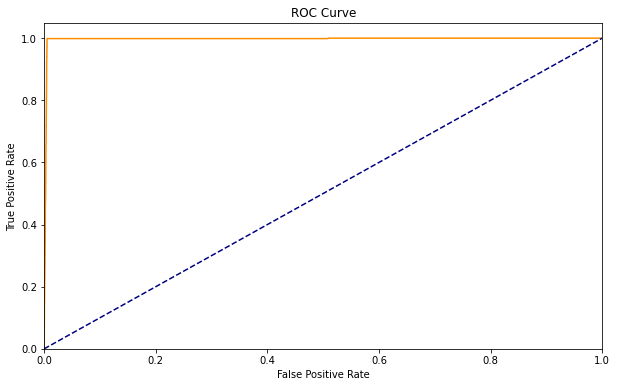

Brier Score:
132.40735746449192


In [13]:
# Train a Logistic Regression model and print the model score
lr = LogisticRegression(max_iter=10000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[52406   119]
 [   29  1721]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     52525
           1       0.94      0.98      0.96      1750

    accuracy                           1.00     54275
   macro avg       0.97      0.99      0.98     54275
weighted avg       1.00      1.00      1.00     54275

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[22413    98]
 [   77   673]]

                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.90      0.88       750

    accuracy                           0.99     23261
   macro avg       0.93      0.95      0.94     23261
weighted avg       0.99      0.99      0.99     23261

    

AUC for the Model Test Set: 0.9969470036870864


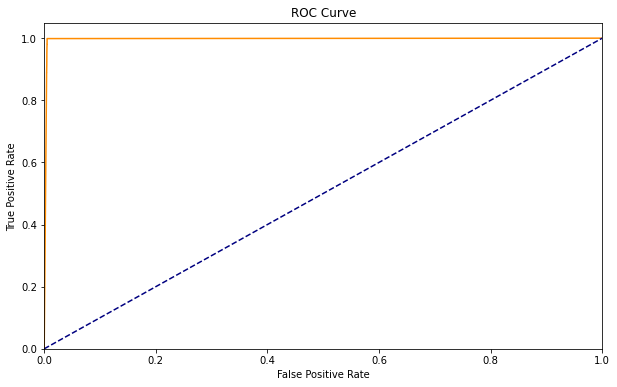

Brier Score:
136.88891331863206


In [14]:
# Train a Random Forest Classifier model and print the model score
rf = RandomForestClassifier(random_state=42)

evaluateModel(rf, X_train, X_test, y_train, y_test)

The Random Forest model was slightly worse than the Logistic Regression model, shown by a slightly higher Brier Score while having a slightly higher AUC. The models seem to be nearly identical in effeciency and accuracy, and could be swayed if hyper parameter tuning was used. 